In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# ------------------------------
# Función de simulación Euler-Maruyama
# ------------------------------
def simulate_path_Allee(r, sigma, N0, dt, n, K, A):
    N = np.zeros(n)
    N[0] = N0
    for i in range(1, n):
        dW = np.sqrt(dt) * np.random.randn()
        N[i] = N[i-1] + r*N[i-1]*(1 - N[i-1]/K)*(N[i-1]/A - 1)*dt + sigma*N[i-1]*dW
        if N[i] < 0:
            N[i] = 0
    return N

# ------------------------------
# Método Runge-Kutta 4 bien implementado
# ------------------------------
def runge_kutta4(f, N0, dt, n):
    N = np.zeros(n)
    N[0] = N0
    for i in range(1, n):
        k1 = f(N[i-1])
        k2 = f(N[i-1] + 0.5 * dt * k1)
        k3 = f(N[i-1] + 0.5 * dt * k2)
        k4 = f(N[i-1] + dt * k3)
        N[i] = N[i-1] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    return N

# ------------------------------
# Solución determinista
# ------------------------------
def Alle_determinista(r, N0, dt, n, K, A):
    def f(N):
        return r * N * (1 - N/K) * (N/A - 1)
    return runge_kutta4(f, N0, dt, n)



In [6]:
def experiment8(
        r=0.2, T=50, dt=0.001, sigma=0.2, 
        K=1000, A=100, 
        N0_ratios=[0.9, 1.1, 20],
        n_paths=20
    ):
    
    n = int(T/dt) + 1
    t = np.linspace(0, T, n)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    for idx, ratio in enumerate(N0_ratios):
        ax = axes[idx]
        N0 = ratio * A

        # Dibujar trayectorias estocásticas
        for _ in range(n_paths):
            N = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
            ax.plot(t, N, color='blue', alpha=0.20)  # muchas trayectorias → baja opacidad

        # Determinista destacada
        N_det = Alle_determinista(r, N0, dt, n, K, A)
        ax.plot(t, N_det, color='black', linewidth=2.5, label='Determinista')

        # Líneas horizontales A y K
        ax.axhline(A, color='red', linestyle='--', linewidth=1.5, label='A' if idx == 0 else None)
        ax.axhline(K, color='gray', linestyle='--', linewidth=1.5, label='K' if idx == 0 else None)

        ax.set_title(f"$N_0/A$ = {ratio}")
        ax.set_xlabel("Tiempo")
        if idx == 0:
            ax.set_ylabel("N(t)")
            ax.legend()

        ax.grid(True)

    plt.tight_layout()
    plt.savefig("experimento8_Allee.png", dpi=1000, bbox_inches='tight')
    plt.show()

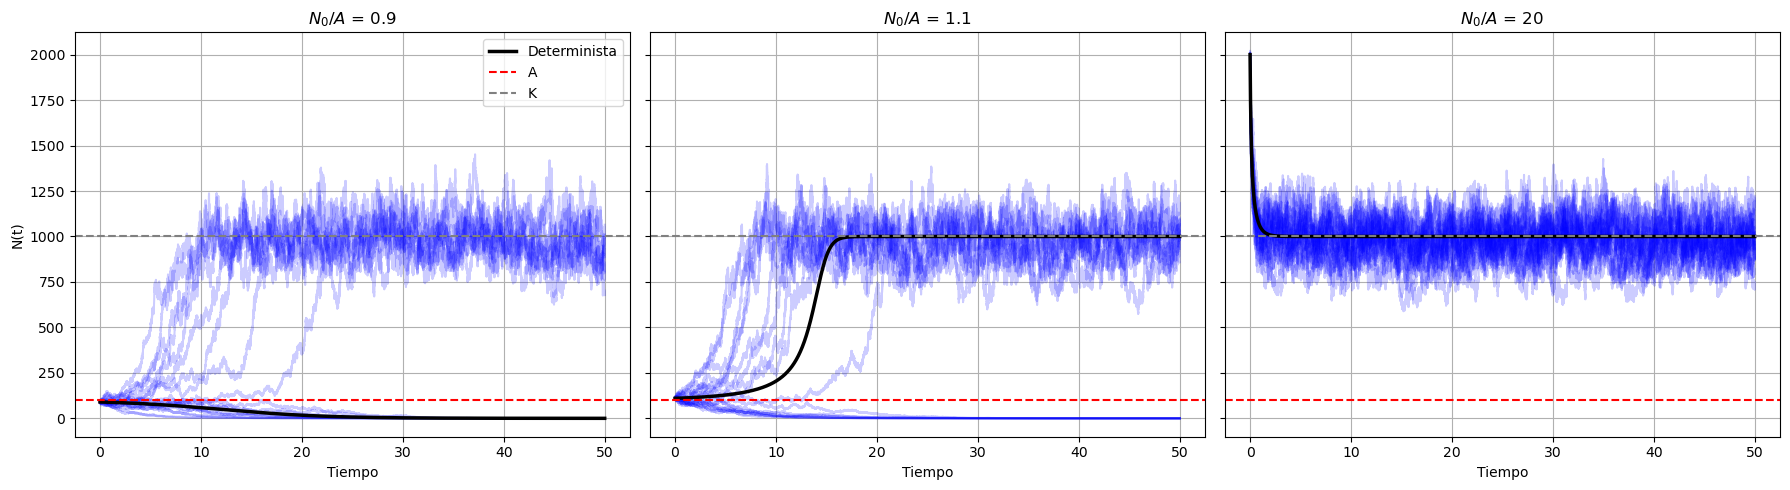

In [7]:
experiment8()

In [51]:
def experimento9(r=0.2, N0=90, T=100, dt=0.001, sigmas=[0.01, 0.1, 0.7], num_paths=20, K=1000, A=100):
    n=int(T/dt)
    t = np.linspace(0, T, n)

    plt.figure(figsize=(15, 10))
    for i, sigma in enumerate(sigmas):
        plt.subplot(1, len(sigmas), i+1)
        for _ in range(num_paths):
            N = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
            plt.plot(t, N, alpha=0.6)
        plt.title(f'Sigma = {sigma}')
        plt.xlabel("Tiempo")

        # Líneas horizontales A y K
        plt.axhline(A, color='red', linestyle='--', linewidth=1.5, label='A' if i == 0 else None)
        plt.axhline(K, color='gray', linestyle='--', linewidth=1.5, label='K' if i == 0 else None)

        if i == 0:
            plt.ylabel("Población")
        plt.grid(alpha=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('experimento9_Allee.png', dpi=900, bbox_inches='tight')
    plt.show()

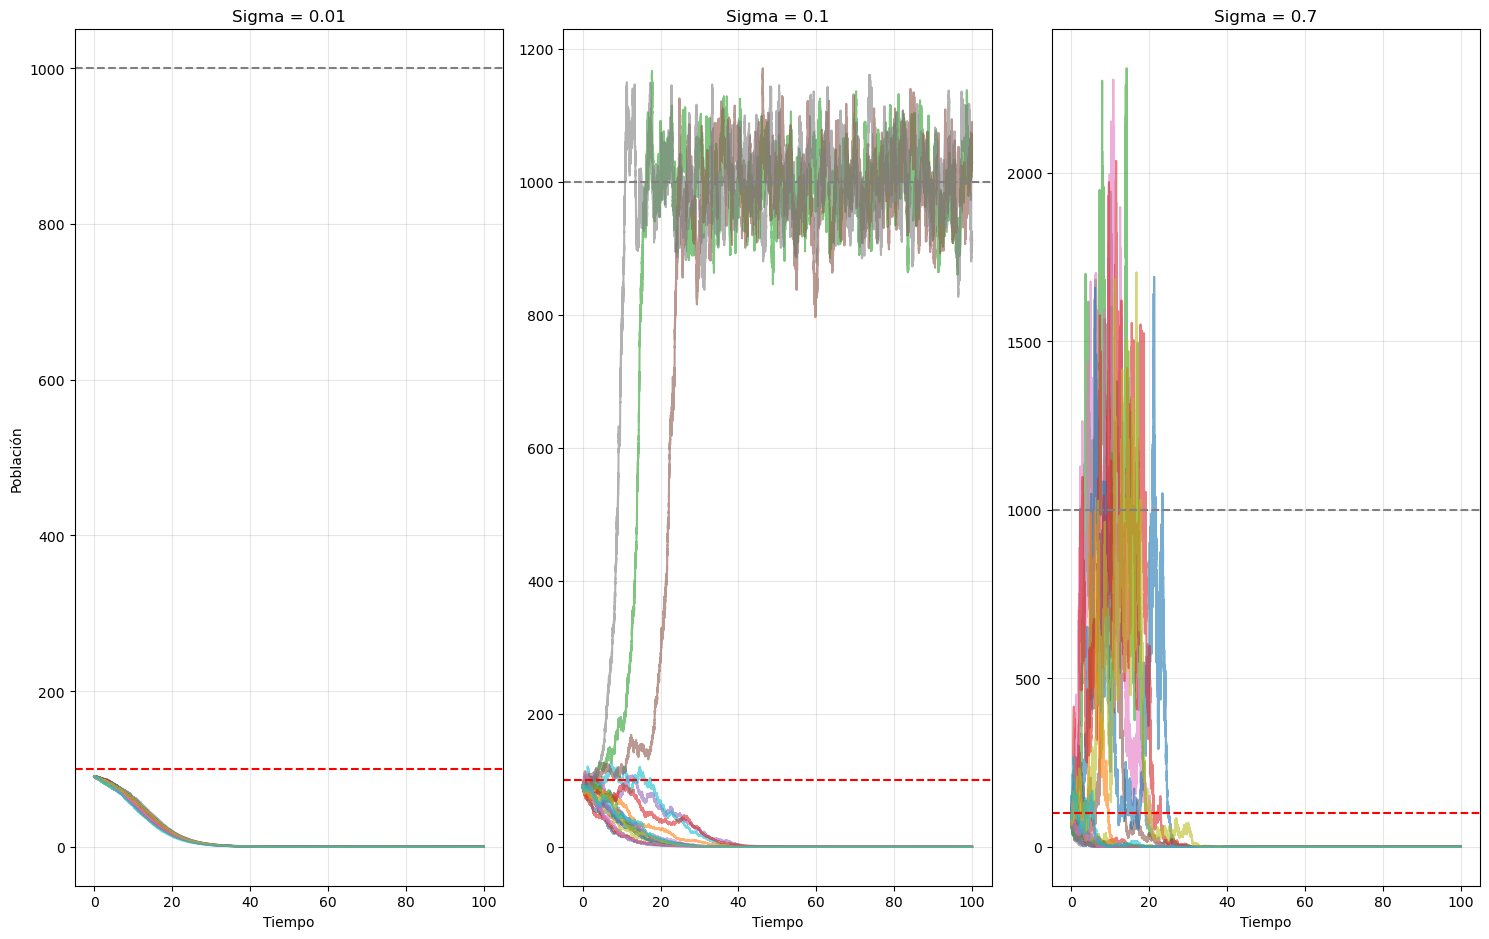

In [52]:
experimento9()

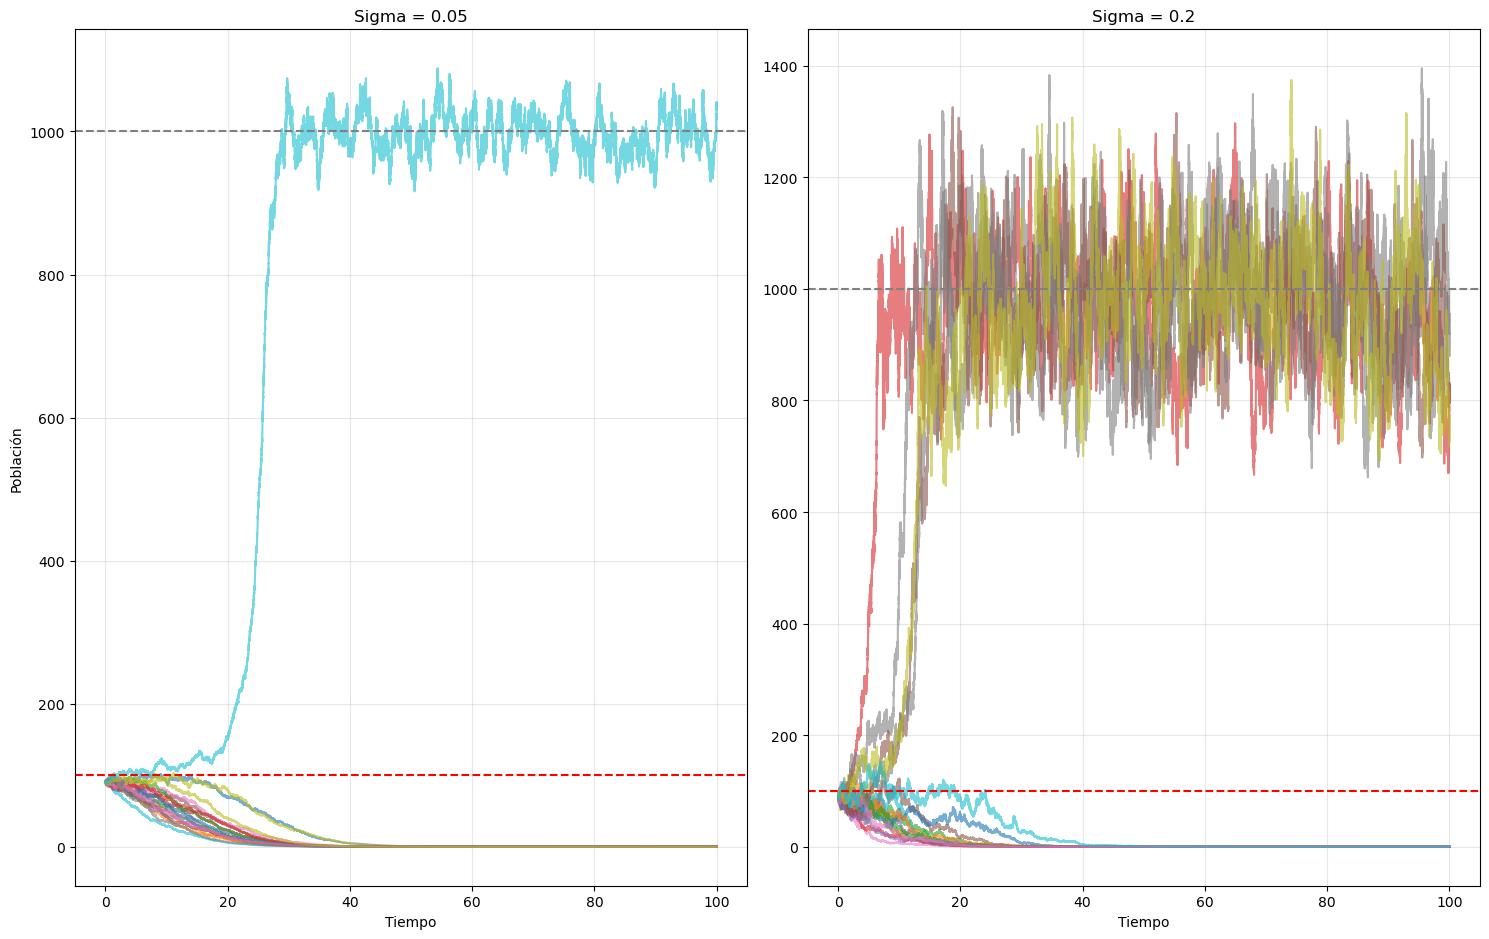

In [34]:
experimento9(sigmas=[0.05, 0.2])

In [30]:
def experiment10(r=0.2, N0=90, T=100, dt=0.001, sigma=0.2, num_runs=2000, K=1000, A=100):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    data = np.zeros((num_runs, n))
    for k in range(num_runs):
        data[k] = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
    
    mean_N = np.mean(data, axis=0)
    median_N = np.median(data, axis=0)
    deterministic = Alle_determinista(r, N0, dt, n, K, A)
    
    plt.figure(figsize=(12, 7))
    plt.plot(t, mean_N, label="Media", linewidth=2)
    plt.plot(t, median_N, label="Mediana", linewidth=2)
    plt.plot(t, deterministic, 'k--', label="Solución determinista")
    plt.xlabel("Tiempo")
    plt.ylabel("Población")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.savefig('media_Allee.png', dpi=900, bbox_inches='tight')
    plt.show()

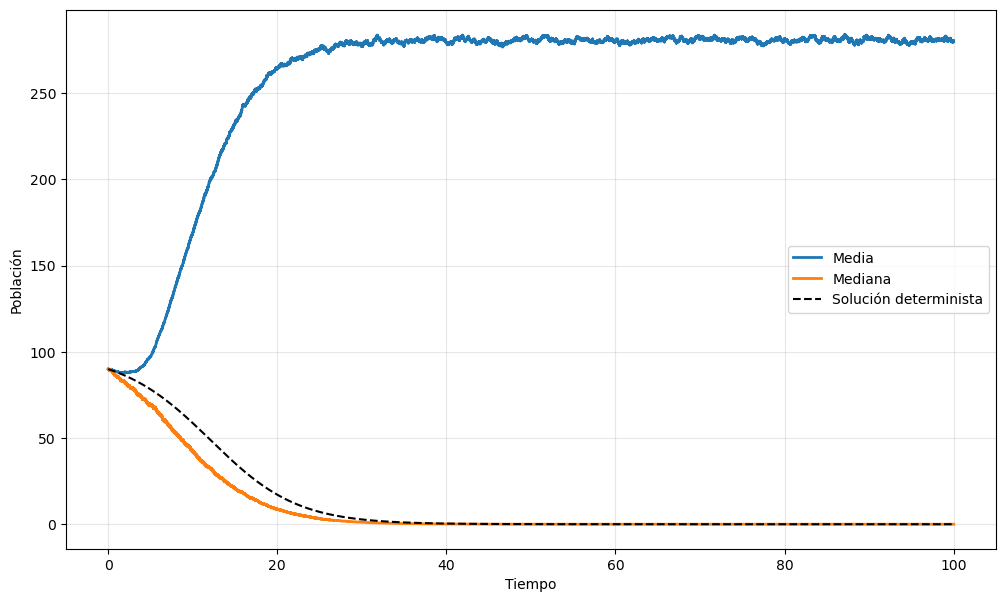

In [31]:
experiment10()

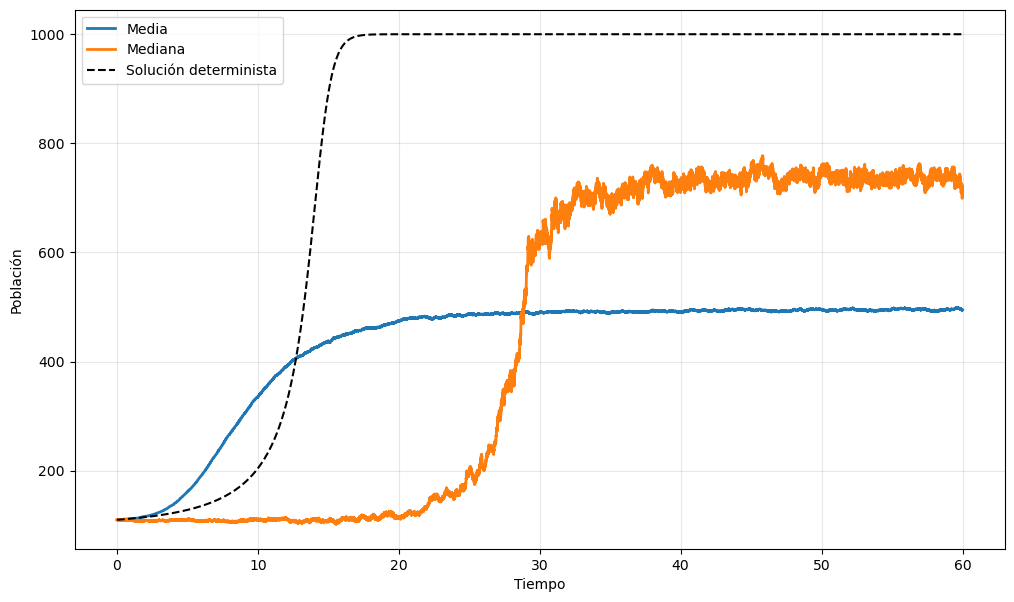

In [39]:
experiment10(N0=110, T=60)

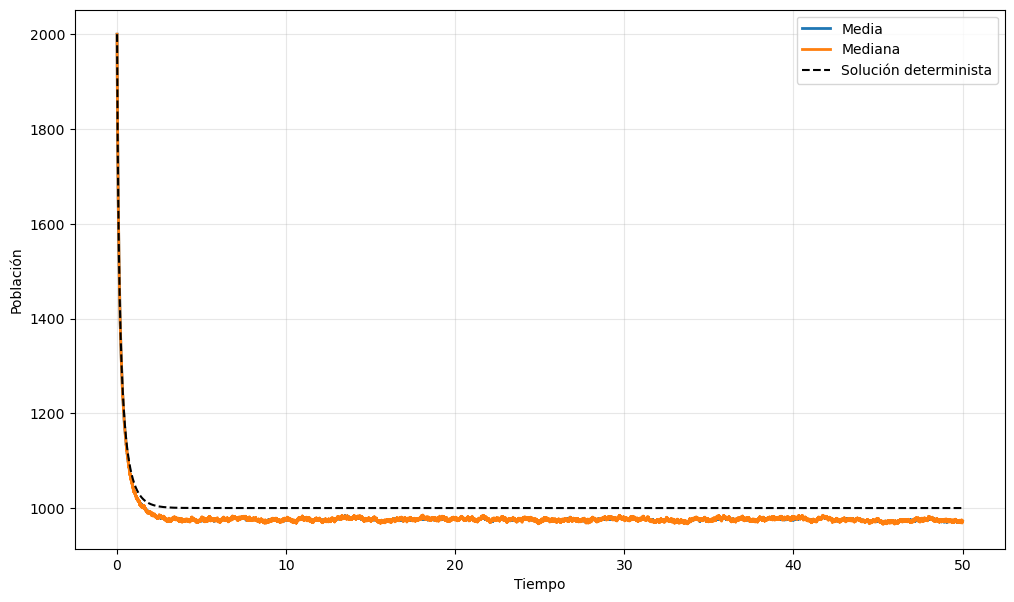

In [40]:
experiment10(N0= 2000, T=50)

In [35]:
def experiment11(r=0.2, N0=100, T=50, dt=0.001, sigmas=[0.01, 0.1], num_runs=5000, K=1000, A=100):
    n = int(T/dt)
    t = np.linspace(0, T, n)
    
    plt.figure(figsize=(12, 5))
    for idx, sigma in enumerate(sigmas):
        final_values = []
        for k in range(num_runs):
            N = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
            final_values.append(N[-1])
        plt.subplot(1, len(sigmas), idx+1)
        plt.hist(final_values, bins=80, density=True, alpha=0.7)
        plt.title(f"Distribución de N(T) para σ = {sigma}")
        plt.xlabel("Valor final N(T)")
        plt.ylabel("Densidad")
        plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('histogramas_Allee.png', dpi=900, bbox_inches='tight')
    plt.show()

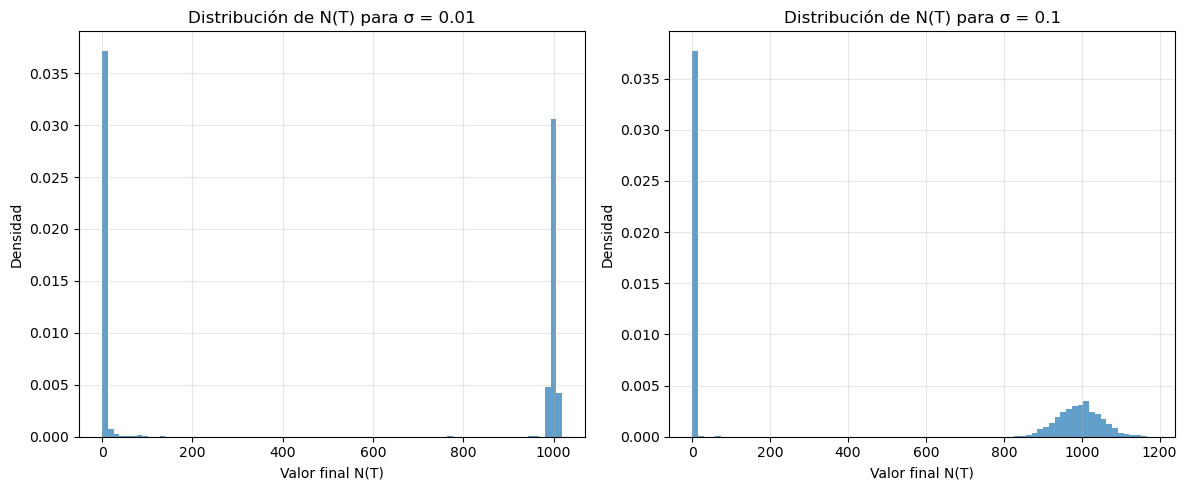

In [36]:
experiment11()

In [37]:
# Vamos a calcular muchas trayectorias para distintos valores de sigma y calcular la media y la mediana del valor final N(T).

def experimento12(r=0.2, N0=90, T=100, dt=0.001, sigmas=[0, 0.001, 0.01, 0.1, 0.2, 0.5, 0.7], num_runs=2000, K=1000, A=100):
    n = int(T/dt)
    t = np.linspace(0, T, n)

    plt.figure(figsize=(15, 10))
    for i, sigma in enumerate(sigmas):
        data = np.zeros((num_runs, n))
        for k in range(num_runs):
            data[k] = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
        
        mean_N = np.mean(data, axis=0)
        median_N = np.median(data, axis=0)

        plt.plot(sigma, mean_N[-1], 'o', label='Media' if i == 0 else "", color='blue')
        plt.plot(sigma, median_N[-1], 'o', label='Mediana' if i == 0 else "", color='red')
    plt.xscale('log')
    plt.xlabel("Sigma")
    plt.ylabel("Valor final N(T)")

    plt.legend()
    plt.grid(alpha=0.3)
    plt.savefig('media_mediana_final_Allee.png', dpi=900, bbox_inches='tight')
    plt.show()

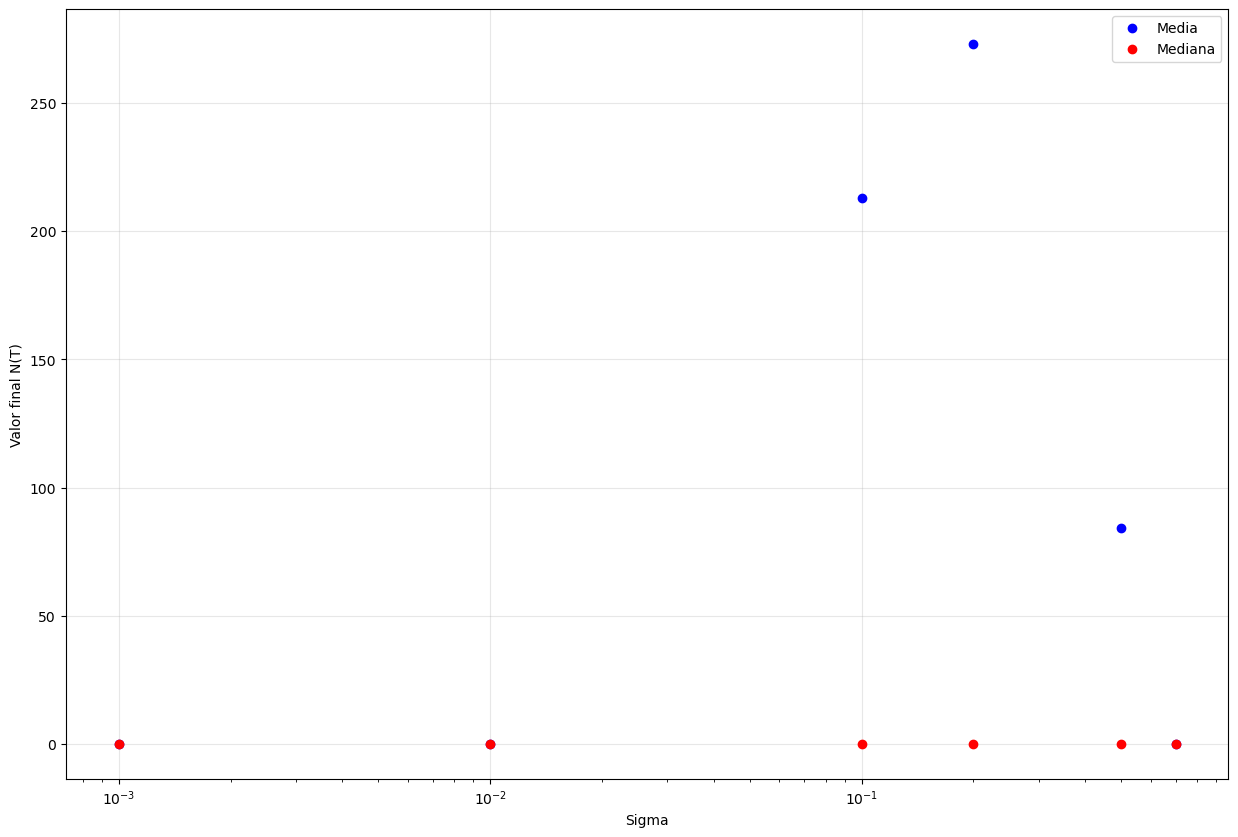

In [38]:
experimento12()

In [45]:
# ------------------------------
# Mapa de calor de extinción
# ------------------------------
def extinction_heatmap(
        r=0.2, T=50, dt=0.001, 
        A=100, K=1000,
        sigma_values=[0.01, 0.1, 0.3, 0.7],
        N0_values=None,
        n_paths=500,
        N_threshold=5
    ):
    
    if N0_values is None:
        N0_values = [0.9*A, 1.1*A, 0.9*K, 2*K]
    
    n = int(T/dt) + 1
    heatmap = np.zeros((len(sigma_values), len(N0_values)))

    # Bucle principal
    for i, sigma in enumerate(sigma_values):
        for j, N0 in enumerate(N0_values):
            extinctions = 0
            for _ in range(n_paths):
                N = simulate_path_Allee(r, sigma, N0, dt, n, K, A)
                if N[-1] < N_threshold:
                    extinctions += 1
            heatmap[i, j] = extinctions / n_paths
            print(f"Sigma={sigma}, N0={N0:.1f} → Extinción={heatmap[i,j]:.3f}")

    # ------------------------------
    # Colormap verde → rojo
    # ------------------------------
    colors = [(0,1,0), (1,1,0), (1,0,0)]  # verde → amarillo → rojo
    cmap = LinearSegmentedColormap.from_list("green_yellow_red", colors)

    # ------------------------------
    # Dibujo del mapa de calor
    # ------------------------------
    plt.figure(figsize=(8,6))
    im = plt.imshow(heatmap, cmap=cmap, origin='lower', aspect='auto', vmin=0, vmax=1)

    # Colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Probabilidad de extinción', fontsize=12)

    # Ejes
    plt.xticks(range(len(N0_values)), [f"{int(N0)}" for N0 in N0_values])
    plt.yticks(range(len(sigma_values)), [f"{sigma}" for sigma in sigma_values])
    plt.xlabel(r"$N_0$ (población inicial)", fontsize=12)
    plt.ylabel(r"$\sigma$ (intensidad del ruido)", fontsize=12)


    plt.savefig('heatmap.png', dpi=900, bbox_inches='tight')

    plt.show()

    return heatmap


Sigma=0.01, N0=90.0 → Extinción=1.000
Sigma=0.01, N0=110.0 → Extinción=0.000
Sigma=0.01, N0=900.0 → Extinción=0.000
Sigma=0.01, N0=2000.0 → Extinción=0.000
Sigma=0.1, N0=90.0 → Extinción=0.744
Sigma=0.1, N0=110.0 → Extinción=0.306
Sigma=0.1, N0=900.0 → Extinción=0.000
Sigma=0.1, N0=2000.0 → Extinción=0.000
Sigma=0.3, N0=90.0 → Extinción=0.714
Sigma=0.3, N0=110.0 → Extinción=0.568
Sigma=0.3, N0=900.0 → Extinción=0.000
Sigma=0.3, N0=2000.0 → Extinción=0.000
Sigma=0.7, N0=90.0 → Extinción=0.960
Sigma=0.7, N0=110.0 → Extinción=0.962
Sigma=0.7, N0=900.0 → Extinción=0.870
Sigma=0.7, N0=2000.0 → Extinción=0.850


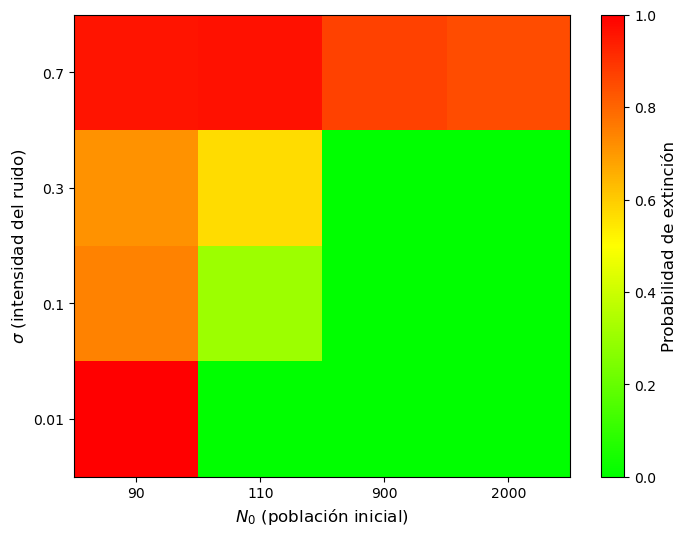

array([[1.   , 0.   , 0.   , 0.   ],
       [0.744, 0.306, 0.   , 0.   ],
       [0.714, 0.568, 0.   , 0.   ],
       [0.96 , 0.962, 0.87 , 0.85 ]])

In [48]:
extinction_heatmap()